# 安徽安庆市项目`WRF-CMAQ`模拟分析
## 模拟结果分析：*`Process Analysis`*

---
*@author: Evan*\
*@date: 2023-08-08*

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import rcParams
config = {
    "font.family":'Times New Roman',
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)

# silence the warning note
import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append('../../src/')
import ModelEvaLib as me
from namelist import *

## 读取数据

In [2]:
pa = xr.open_dataset(pafile)

lat  = pa.latitude
lon  = pa.longitude
HNO3 = np.mean(pa.HNO3prod[:,0,:,:],0)
H2O2 = np.mean(pa.H2O2prod[:,0,:,:],0)

# HNO3_L1 = np.mean(np.mean(pa.HNO3prod[:,:4,:,:],0),0)
# H2O2_L1 = np.mean(np.mean(pa.H2O2prod[:,:4,:,:],0),0)
# HNO3_L2 = np.mean(np.mean(pa.HNO3prod[:,4:19,:,:],0),0)
# H2O2_L2 = np.mean(np.mean(pa.H2O2prod[:,4:19,:,:],0),0)

HNO3.shape

(138, 135)

In [3]:
# ratio_L1=H2O2_L1/HNO3_L1
# ratio_L2=H2O2_L2/HNO3_L2

ratio=H2O2/HNO3
ratio.shape

(138, 135)

## 绘图

In [4]:
import cartopy.crs as ccrs
import cartopy.feature as cfeat
from cartopy.io.shapereader import Reader
import cmaps

In [5]:
shp_aq = Reader(shpmap)
shp_pro = Reader('D:/data/shapefile/ChinaAdminDivisonSHP-master/2. Province/province.shp')
shp_cit = Reader('D:/data/shapefile/ChinaAdminDivisonSHP-master/3. City/city.shp')

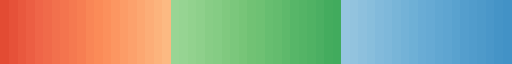

In [6]:
# ! 绘制不等距colorbar
import matplotlib as mpl
bins=[0,0.3,0.6,1]

cmap1=cmaps.MPL_OrRd_r
cmap2=cmaps.MPL_Greens
cmap3=cmaps.MPL_Blues
listmap1=cmap1[40:80](np.linspace(0,1,20))
listmap2=cmap2[50:80](np.linspace(0,1,20))
listmap3=cmap3[50:80](np.linspace(0,1,20))
newcolor=np.vstack((listmap1,listmap2,listmap3))
newcmap=mpl.colors.ListedColormap(newcolor,name='newcmap')
norms=mpl.colors.BoundaryNorm(bins,newcmap.N)

newcmap

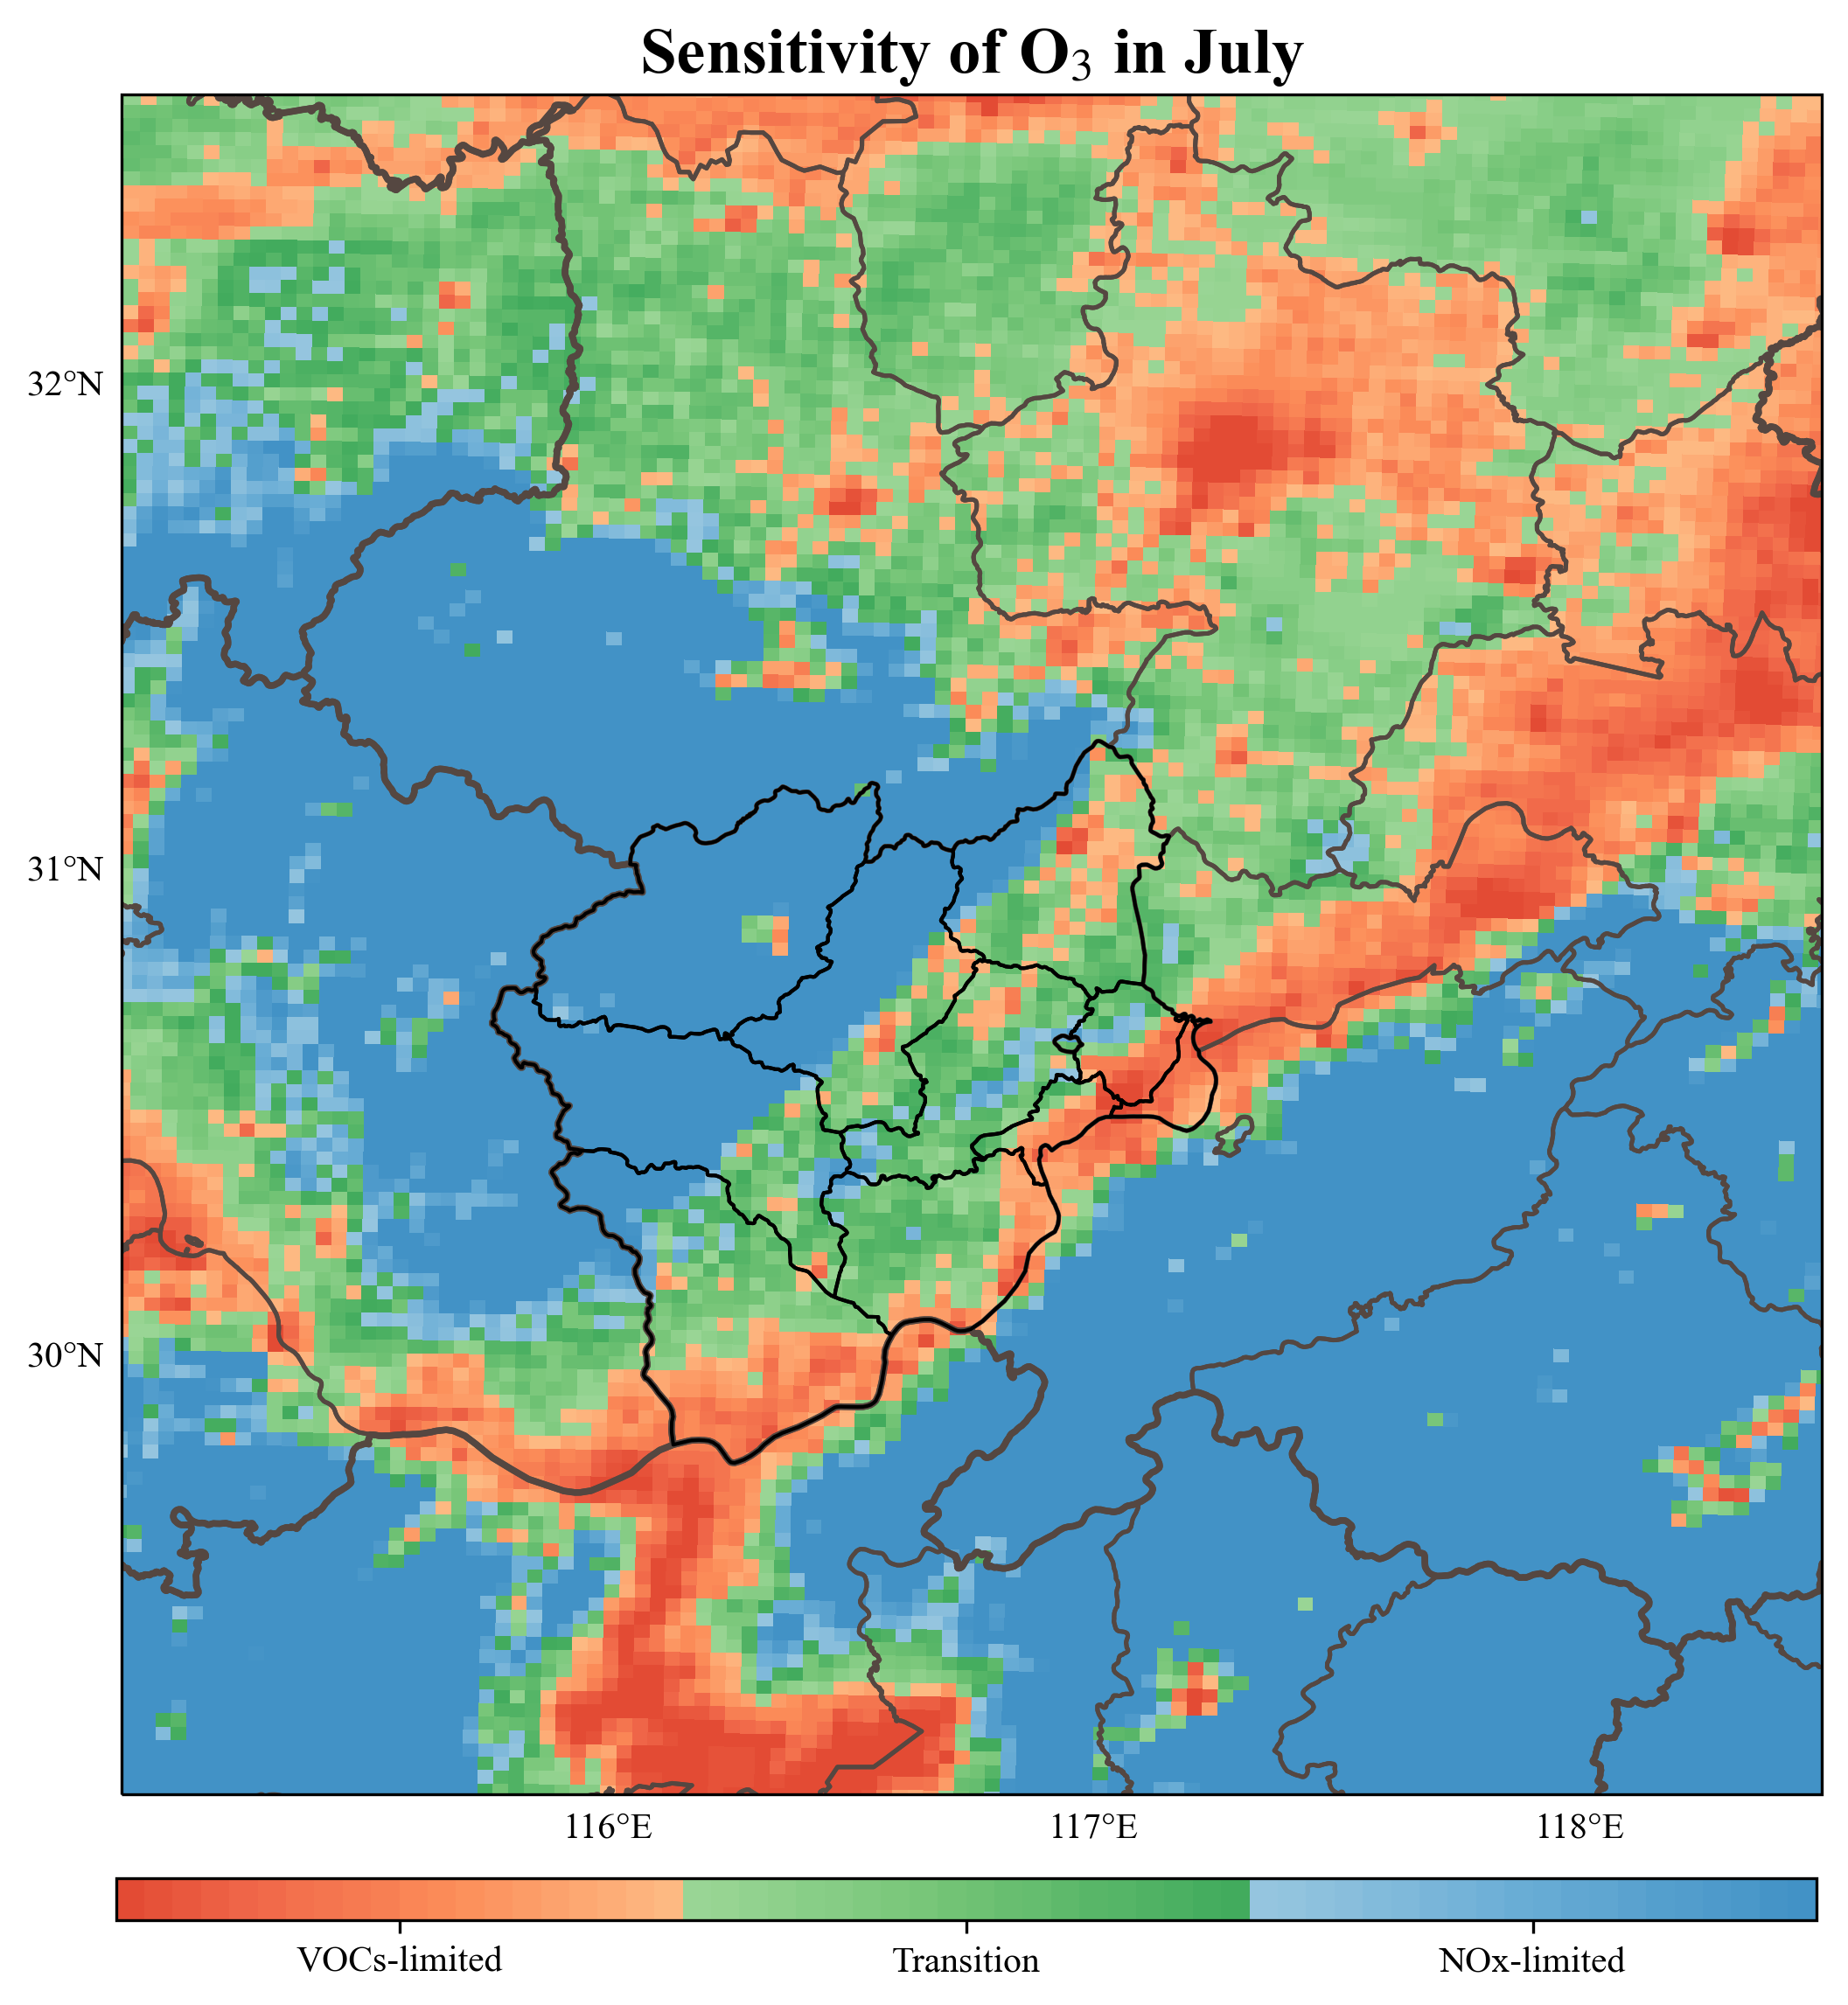

In [7]:
cmaplevel=np.arange(0,0.91,0.01)
proj=ccrs.PlateCarree()
fig = plt.figure(figsize=(9,8),dpi=300)
ax = fig.subplots(1,1,subplot_kw={'projection':proj})

# SHP Lines
ax.add_feature(cfeat.ShapelyFeature(shp_pro.geometries(),proj,edgecolor='#554741',facecolor='None'), linewidth=1.8)
ax.add_feature(cfeat.ShapelyFeature(shp_cit.geometries(),proj,edgecolor='#554741',facecolor='None'), linewidth=1.2)
ax.add_feature(cfeat.ShapelyFeature(shp_aq.geometries(),proj,edgecolor='k',facecolor='None'), linewidth=1)

ax.set_extent([115., 118.5, 29.1, 32.6],ccrs.PlateCarree())

# set ticks
gl=ax.gridlines(
    xlocs=np.arange(-180, 180 + 1, 1), ylocs=np.arange(-90, 90 + 1, 1),
    draw_labels=True, x_inline=False, y_inline=False,
    linewidth=0, linestyle='--', color='gray')
gl.top_labels = False
gl.right_labels =False
gl.rotate_labels=False

# cf=ax.contourf(lon,lat,ratio,transform=proj,cmap=newcmap,levels=cmaplevel,extend='max')
cp=ax.pcolormesh(lon,lat,ratio,transform=proj,cmap=newcmap,vmin=0,vmax=0.9)

# share colorbar
fig.subplots_adjust(top=0.92,wspace=0.05)
position= fig.add_axes([0.15,0.05,0.72,0.02])
cbar=fig.colorbar(cp,cax=position,orientation='horizontal')
cbar.set_ticks(np.array([0.15,0.45,0.75]))
cbar.set_ticklabels(['VOCs-limited','Transition','NOx-limited'])

ax.set_title('Sensitivity of O$_3$ in July',fontweight='bold',size=18)
plt.show()